<h1>House Prices: Advanced Regression Techniques</h1>


  <h4>This is my first Kaggle for the House Prices competition.
It includes the following approaches and techniques:</h4>
The notebook is organized as follows:

**Part 0: [Imports, Settings and switches, Global functions]**

import libraries

settings for number of cross validations

define functions that are used often

**Part 1: Exploratory Data Analysis**

1.1 Get an overview of the features (numerical and categorical) and first look on the target variable SalePrice
shape, info, head and describe
Distribution of the target variable SalePrice
Numerical and Categorical features
List of features with missing values and Filling missing values
log transform

1.2 Relation of all features to target SalePrice
Seaborn regression plots for numerical features
List of numerical features and their correlation coefficient to target
Seaborn boxplots for categorical features
List of categorical features and their unique values

1.3 Determine the columns that show strong correlation to target
Correlation matrix 1 : all numerical features
Determine features with largest correlation to SalePrice_Log.

**Part 2: Data Preprocessing**

2.1 Dropping all columns with weak correlation to SalePrice

2.2 Checking correlation to SalePrice for the new numerical columns
use only features with strong correlation to target

**Part 3: Machine Learning**

<h1> Part 0 :</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats


**Data description**

*This is a detailed description of the 81 features and their entries, quite important for this competition.*

**Overview of dataset** <br>
1.Import the useful Data Science Libraries. <br>
2.Let's first check about the train and test dataset. <br>
3.Number of rows and columns in dataset?<br>
4.What are the features name (columns)?<br>
5.Check which features are numerical, which are categorical?<br>
6.How many values are missing?<br>

In [2]:
df_raw= pd.read_csv('Downloads/houseprice/train.csv', parse_dates= ['SalePrice'], low_memory=False) #Reading the Dataset

In [3]:
df_raw.head() #Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_raw.shape #Shape of the Train including no.of rows and the Columns.

(1460, 81)

**The `info()` method is useful to get a quick description of the data,**
<br>in particular the total number of rows and each attributes types and number of non-null values.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_raw.describe()  #describe gives a summary of the statistics (only for numerical columns)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [7]:
def display_all(df):   
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [9]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
numerical_feats = df_raw.dtypes[df_raw.dtypes != "object"].index  
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_raw.dtypes[df_raw.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

#Total number of attributes equals 81, of which 36 is quantitative(Numerical), 43 qualitative + Id and SalePrice(Categorical)

Number of Numerical features:  37
Number of Categorical features:  44


<b> dtypes </b>

It is a method to return a Series with the data type of each column. The result’s index is the original DataFrame’s columns

In [11]:
??df_raw.dtypes

In [12]:
df_raw.dtypes.describe()

count         81
unique         3
top       object
freq          44
dtype: object

In [13]:
df_raw.isnull() #isnull()Method creates a Boolean Series for extracting rows with null values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [14]:
print(df_raw[numerical_feats].columns)
print(df_raw[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', '

In [15]:
%time df_raw[numerical_feats].head()

Wall time: 6.94 ms


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [16]:
df_raw[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [17]:
#Missing Values from Top - Bottom

total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

<b>'SalePrice' </b> is the reason of our quest

There is lots of info that is probably related to the SalePrice like the the neighborhood, the condition and quality. Maybe other features are not so important for predicting the target, also there might be a strong correlation for some of the features (like GarageCars and GarageArea).

In [20]:
df_raw['SalePrice'].describe()

count       1460
unique       663
top       140000
freq          20
Name: SalePrice, dtype: object

In [21]:
df_raw['SalePrice_log']= pd.to_numeric(df_raw['SalePrice'])  #to_numeric convert argument to a numeric type.

In [22]:
df_raw['SalePrice_log'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice_log, dtype: float64

In [23]:
df_raw['SalePrice_log'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice_log, dtype: int64

# Part 1

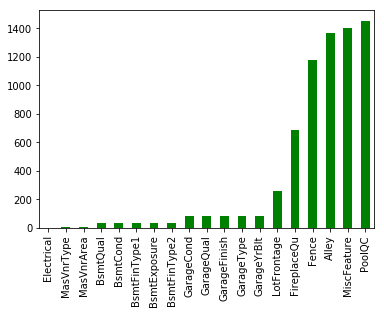

In [19]:
missing = df_raw.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='g')

<b> 19 Features have missing values, 5 over 50% of all data. </b>

### Relationship with numerical variables

Scatter plots are used when you want to show the relationship between two variables. 

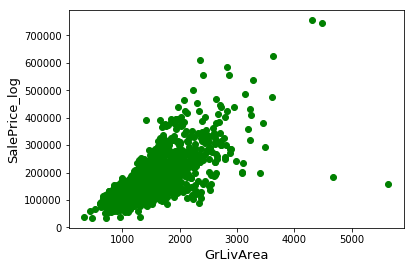

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['GrLivArea'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

And what about others?

In [25]:
df_raw['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

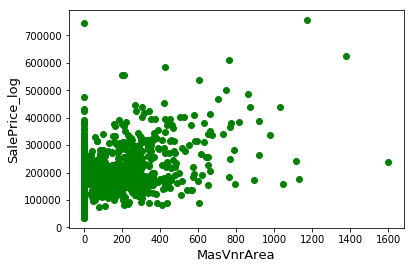

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['MasVnrArea'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('MasVnrArea', fontsize=13)
plt.show()

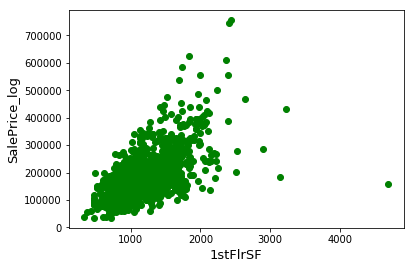

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['1stFlrSF'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

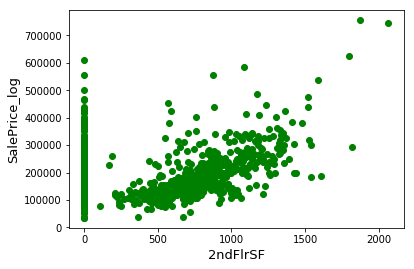

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['2ndFlrSF'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('2ndFlrSF', fontsize=13)
plt.show()

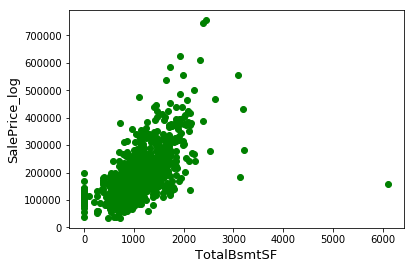

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['TotalBsmtSF'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

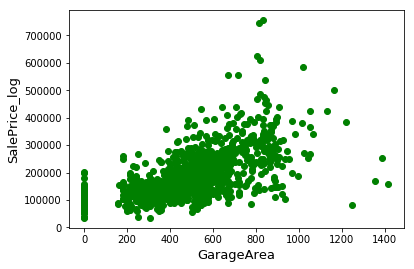

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['GarageArea'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

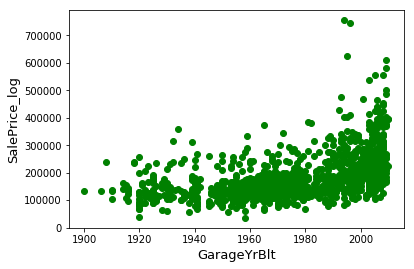

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = df_raw['GarageYrBlt'], y = df_raw['SalePrice_log'], color='g')
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GarageYrBlt', fontsize=13)
plt.show()

In [32]:
type(df_raw['SalePrice_log'])

pandas.core.series.Series

In [33]:
Numerical = [f for f in df_raw.columns if df_raw.dtypes[f] != 'object']
Categorical = [f for f in df_raw.columns if df_raw.dtypes[f] == 'object']

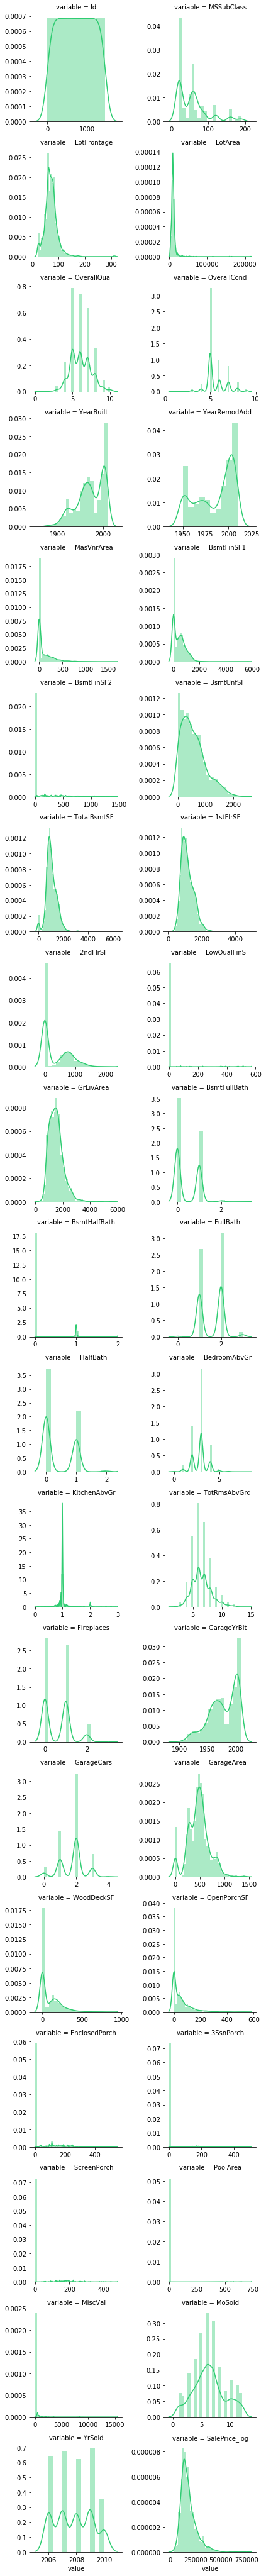

In [34]:
f = pd.melt(df_raw, value_vars=Numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color="#2ecc71")

## .Log Transformation

In [35]:
for col in Numerical:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_raw[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_raw[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

**Skewness** is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.

**kurtosis** is actually the measure of outliers present in the distribution.

Skewness: 1.882876
Kurtosis: 6.536282


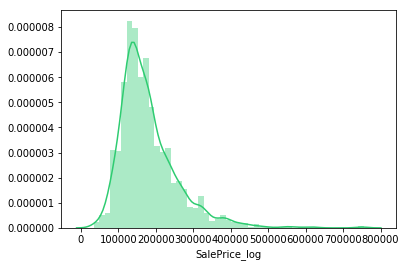

In [36]:
import seaborn as sns
sns.distplot(df_raw['SalePrice_log'],color="#2ecc71");
#skewness and kurtosis
print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

Therfore we make a log transformation, the resulting distribution looks much better.

In [37]:
#df_raw.drop('SalePrice', axis= 1, inplace=True)

Skewness: 0.121335
Kurtosis: 0.809532


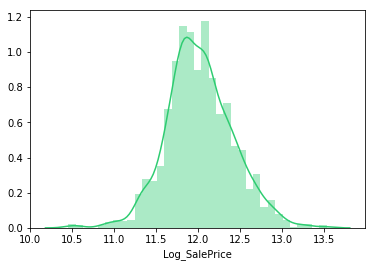

In [38]:
df_raw['Log_SalePrice'] = np.log(df_raw['SalePrice_log'])

sns.distplot(df_raw['Log_SalePrice'],color="#2ecc71");
# skewness and kurtosis
print("Skewness: %f" % df_raw['Log_SalePrice'].skew())
print("Kurtosis: %f" % df_raw['Log_SalePrice'].kurt())
# dropping old column
#df_raw.drop('SalePrice_log', axis= 1, inplace=True)


**Relationship with categorical features**

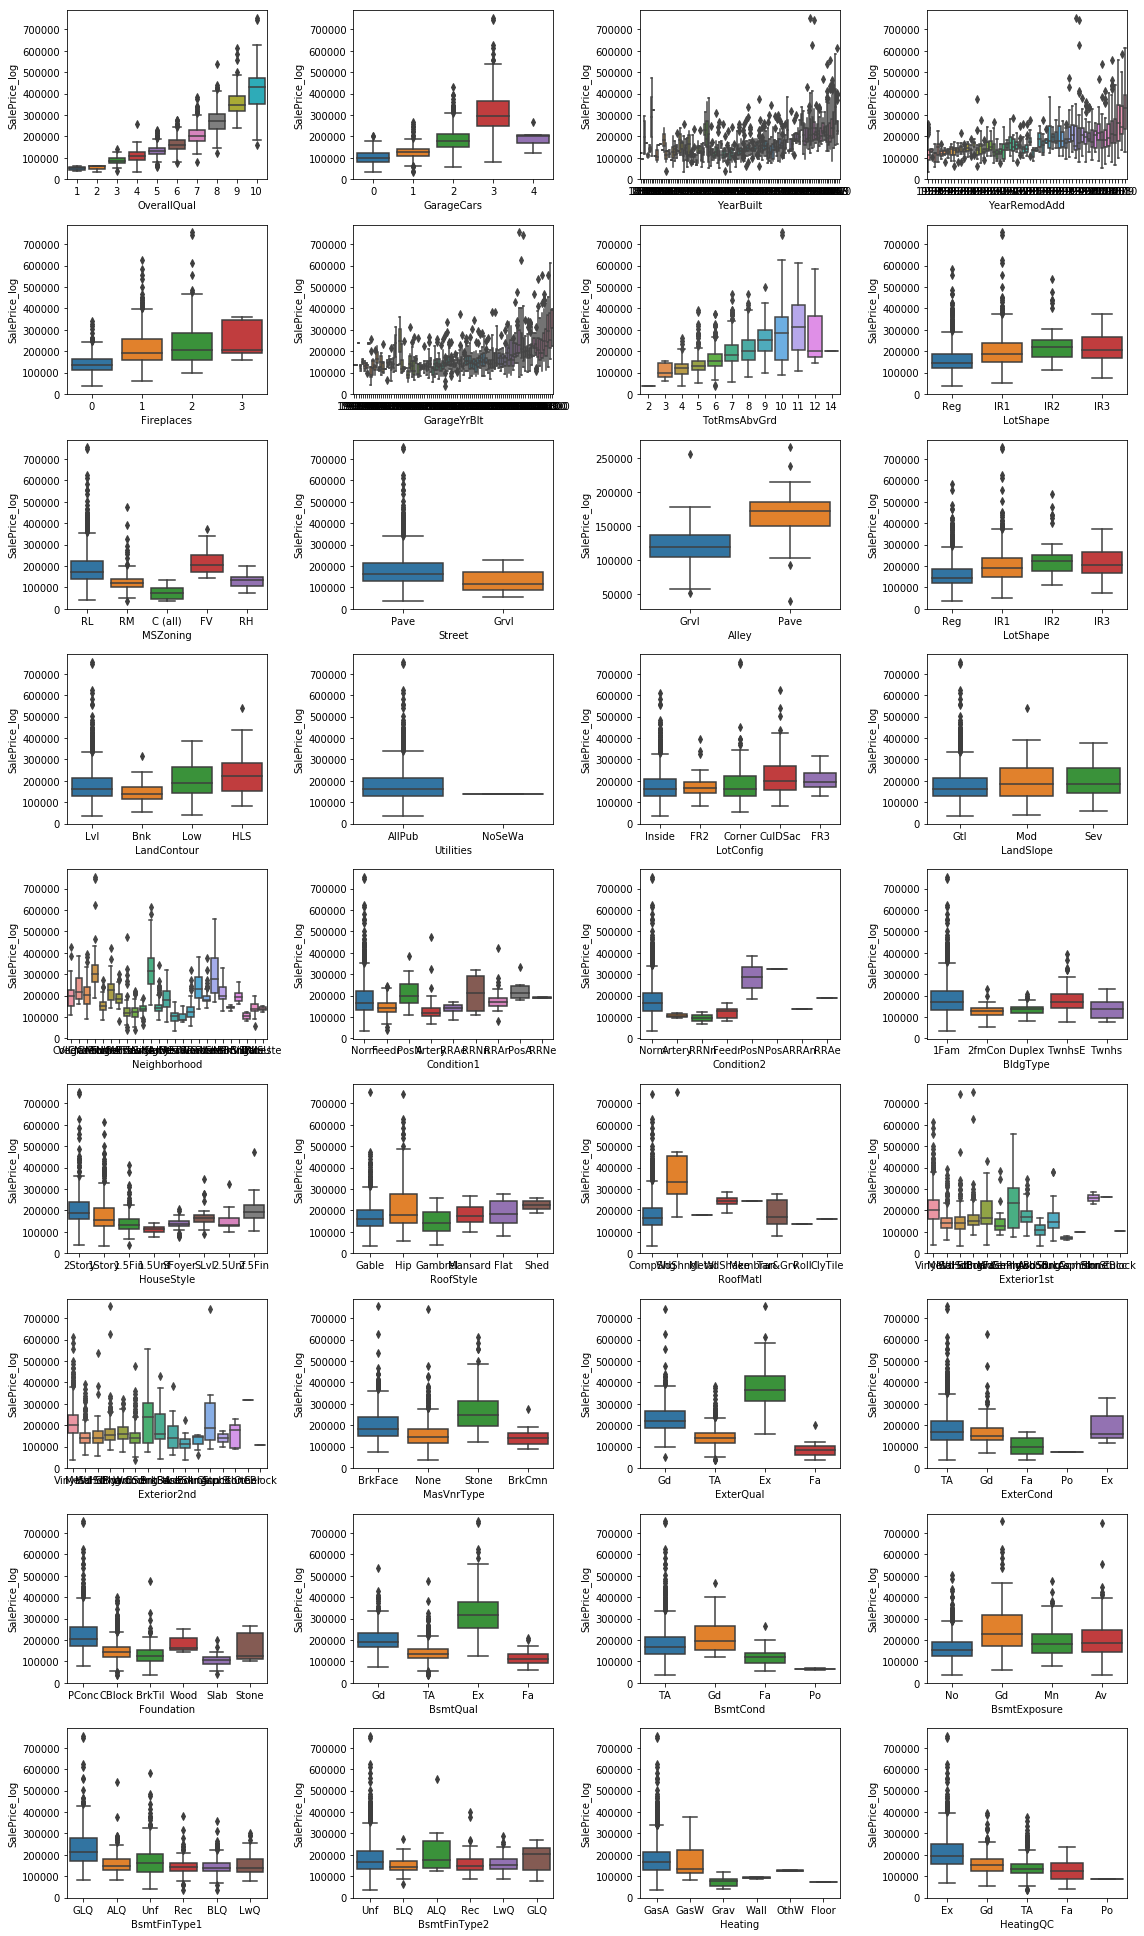

In [39]:
li_cat_feats = ['OverallQual','GarageCars', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'TotRmsAbvGrd','LotShape','MSZoning',
                'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
target = 'SalePrice_log'
nr_rows = 9
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=df_raw, ax = axs[r][c])
plt.tight_layout()    
plt.show()

**Correlation matrix (heatmap style)**

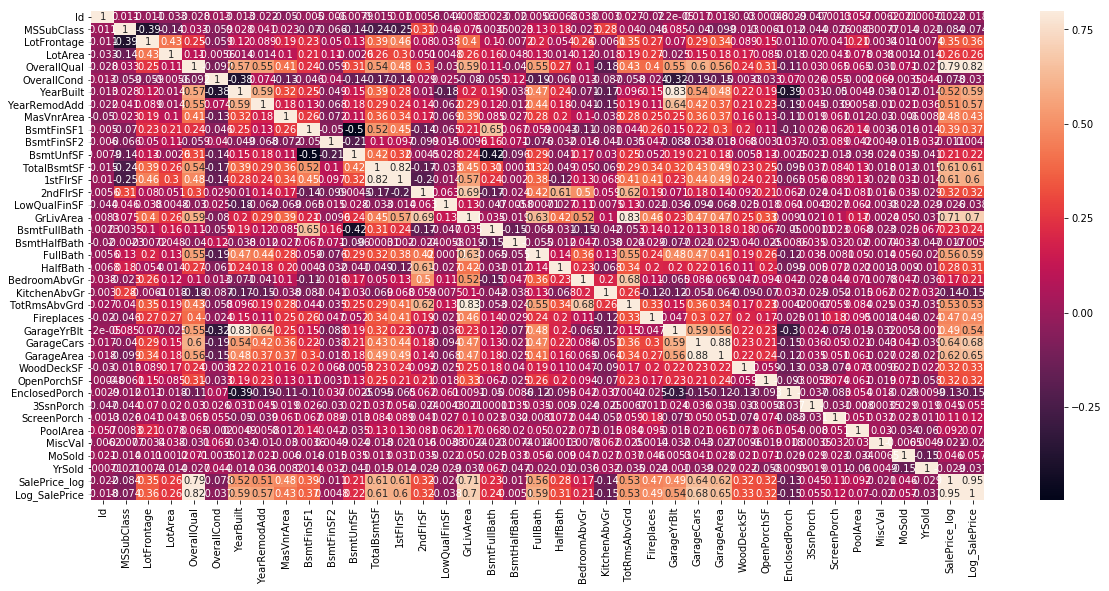

In [40]:
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

**zoomed heatmap style**

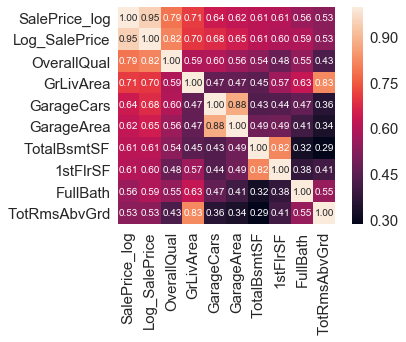

In [41]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<b> According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this: </b>
<Ul>
    <li> 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check! </li>
    <li> 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. </li>
    <li>'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
    <li>'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
    <li>'FullBath'?? Really?
   <li> 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
    

<h1>Part 2</h1>

List of features with missing values

In [42]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [43]:
# dropping old column
#df_raw.drop('SalePrice', axis= 1, inplace=True)
# dropping old column
#df_raw.drop('SalePrice_log', axis= 1, inplace=True)
# dropping old column
#df_raw.drop('Id', axis= 1, inplace=True)

Filling missing values
For a few columns there is lots of NaN entries.

In [44]:
cols_fillna = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
for col in cols_fillna:
    df_raw[col].fillna('None',inplace=True)

In [45]:
df_raw.fillna(df_raw.median(), inplace= True)

In [46]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = ((df_raw.isnull().sum()/df_raw.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [47]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-nu

In [48]:
print(df_raw.isnull().sum().sum())
df_raw.isnull().sum()

6617


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt         0
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchS

In [49]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_raw['SalePrice_log'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<h1> Part 3 </h1>

In [50]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [56]:
train = pd.read_csv("Downloads/houseprice/train.csv") 
test = pd.read_csv("Downloads/houseprice/test.csv").drop('Id',axis=1,inplace=False)
origin = pd.DataFrame(df_raw['SalePrice'])

In [57]:
dif = np.abs(test-origin) > 12000

In [58]:
idx = dif[dif['SalePrice']].index.tolist()
train.drop(train.index[idx],inplace=True)

In [59]:
train.shape

(1460, 81)

In [62]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [63]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import skew
import datetime
 
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)    
    
def create_submission(prediction,score):
    now = datetime.datetime.now()
    sub_file = 'submission_'+str(score)+'_'+str(now.strftime("%Y-%m-%d-%H-%M"))+'.csv'
    print ('Creating submission: ', sub_file)
    pd.DataFrame({'Id': test['Id'].values, 'SalePrice': prediction}).to_csv(sub_file, index=False)

def data_preprocess(train,test):
    outlier_idx = [4,11,13,20,46,66,70,167,178,185,199, 224,261, 309,313,318, 349,412,423,440,454,477,478, 523,540, 581,588,595,654,688, 691, 774, 798, 875, 898,926,970,987,1027,1109, 1169,1182,1239, 1256,1298,1324,1353,1359,1405,1442,1447]
    train.drop(train.index[outlier_idx],inplace=True)
    all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                          test.loc[:,'MSSubClass':'SaleCondition']))
    
    to_delete = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    all_data = all_data.drop(to_delete,axis=1)

    train["SalePrice"] = np.log1p(train["SalePrice"])
    #log transform skewed numeric features
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_feats = skewed_feats.index
    all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
    all_data = pd.get_dummies(all_data)
    all_data = all_data.fillna(all_data.mean())
    X_train = all_data[:train.shape[0]]
    X_test = all_data[train.shape[0]:]
    y = train.SalePrice

    return X_train,X_test,y
def model_xgb_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    
    xgbreg = xgb.XGBRegressor(seed=0)
    param_grid = {
    }
    model = GridSearchCV(estimator=xgbreg, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('eXtreme Gradient Boosting regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_extra_trees_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    
    etr = ExtraTreesRegressor(n_jobs=1, random_state=0)
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}
    model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Extra trees regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

Xtrain,Xtest,ytrain = data_preprocess(train,test)


test_predict,score = model_extra_trees_regression(Xtrain,Xtest,ytrain)

create_submission(np.exp(test_predict),score)

Extra trees regression...
Best Params:
{}
Best CV Score:
0.14013616175747576
Creating submission:  submission_0.14013616175747576_2019-05-23-22-34.csv


In [66]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_predict})
# you could use any filename. We choose submission here
my_submission.to_csv('Downloads/houseprice/submission.csv', index=False)
my_submission.head()

,Id,SalePrice
0,1461,11.750303
1,1462,12.003814
2,1463,12.071155
3,1464,12.085400
4,1465,12.179725
